<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:68 px; height:68px;">
<img src="./images/nmc_logo.png" alt="NMC Logo" style="height: 68px;">
</div>
    
<h1>MICAPS Cassandra Server 分布式数据库数据读取</h1>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:350 px"><img src="./images/micaps_data_server.png" alt="NumPy Logo" style="height: 300px;"></div>

MICAPS分布式数据环境（BDIPS）提供WEBService API方式来检索海量气象数据信息. [nmc_met_io](https://github.com/nmcdev/nmc_met_io)程序库的[retrieve_micaps_server](https://github.com/nmcdev/nmc_met_io/blob/master/nmc_met_io/retrieve_micaps_server.py)模块, 基于WEBService API接口实现了Python语言对BDIPS数据的检索和读取.

### retrieve_micaps_server模块主要功能:
* 使用WEBService API接口, 无需额外的MICAPS Cassandra Server读取程序库;
* 引入的本地文件缓存技术, 加快数据的快速读取;
* 支持模式数据标量场, 矢量场及集合成员数据的读取; 
* 支持模式单点时间序列, 单点廓线及廓线时序的读取;
* 支持站点, 探空观测数据的读取;
* 支持awx格式的静止气象卫星等经纬度数据读取;
* 支持LATLON格式的雷达拼图数据读取;
* 统一的返回数据类型, 格点数据返回为[xarray](http://xarray.pydata.org/en/stable/)类型, 站点数据返回为[pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)类型.

### 参考网站
* https://github.com/nmcdev/nmc_met_io
* http://www.micaps.cn/MifunForum/topic/list?fId=7
---

## 安装和配置nmc_met_io程序库

建议安装[Anaconda](https://www.anaconda.com/distribution/)的Python环境. [nmc_met_io](https://github.com/nmcdev/nmc_met_io)为开源程序库, 放置在GitHub网站上, 目前尚不支持[Pypi](https://pypi.org/)和[conda](https://conda-forge.org/)安装. 安装命令如下:
> pip install git+git://github.com/nmcdev/nmc_met_io.git

该安装过程会自动安装numpy, scipy, tqdm, ...等支持库.

MICAPS分布式服务器的网络地址和端口在配置文件*config.ini*中设置. *config.ini*文件放置在系统用户目录下:
* Windows, "C:/Users/用户名/.nmcdev/"
* Linux, "/home/用户名/.nmcdev/"

*config.ini*遵循Python的[配置文件](https://docs.python.org/3/library/configparser.html)格式:
```Python
[MICAPS]
GDS_IP = xx.xx.xx.xx
GDS_PORT = xxxx
# Cached file directory, if not set,
#   /home/user/.nmcdev/cache will be used.
# CACHE_DIR = ~ 
```
文件中`GDS_IP`为服务器地址, `GDS_PORT`为端口, 把`CACHE_DIR`的注释#去掉, 可以指定缓存文件地址(默认缓存地址为".nmcdev/cache/").

---

In [1]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from nmc_met_io.retrieve_micaps_server import get_model_grid, get_model_grids

## 数值模式预报数据读取
<div style="float:right; width:350 px"><img src="./images/micaps_retrieve_UI.png" alt="image" style="height: 250px;"></div>

模块`retrieve_micaps_server`提供读取数值模式网格预报数据的函数:
 * `get_model_grid`: 读取单个时次标量, 矢量或集合成员的2D平面预报数据;
 * `get_model_grids`: 读取多个时次标量, 矢量或集合成员的2D平面预报数据;
 * `get_model_points`: 获取指定经纬度点的模式预报数据;
 * `get_model_3D_grid`: 获得单个时次标量, 矢量或集合成员的[lev, lat, lon]3D预报数据;
 * `get_model_3D_grids`: 获得多个时次标量, 矢量或集合成员的[lev, lat, lon]3D预报数据;
 * `get_model_profiles`: 获得制定经纬度单点的模块廓线预报数据.

每个函数都有固定的参数`directory`和`filename`(或`filenames`), 如
```Python
# MICAPS分布式服务器上的数据地址, 可通过MICAPS4的数据源检索界面查找,
# 如右图, 找到数据存放的目录, 鼠标右键点击"保存路径到剪切板", 粘贴去掉"mdfs:///"
directory = 'ECMWF_HR/TMP/850'
# 指定具体的数据文件, 一般格式为"起报时间.预报时效", 若不指定, 则自动获得目录下最新数据的文件名
filename = '18021708.024'
# 调用函数读取数据
data = get_model_grid(directory, filename=filename)
```

### 读取单个时次模式标量预报数据

In [3]:
directory = 'ECMWF_HR/TMP/850'
filename = '20021608.024'
data = get_model_grid(directory, filename=filename, cache=False)
if data is not None:
    print(data)
else:
    print("Retrieve failed.")

<xarray.Dataset>
Dimensions:                  (lat: 281, level: 1, lon: 361, time: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2020-02-17T08:00:00
  * level                    (level) float32 850.0
  * lat                      (lat) float64 60.0 59.75 59.5 ... -9.5 -9.75 -10.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2020-02-16T08:00:00
    forecast_period          (time) float64 24.0
Data variables:
    data                     (time, level, lat, lon) float32 -7.594082 ... 18.874668
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server


<div class="alert alert-success">
    <b>返回xarray数据结构</b>:
    <ul>
        <li>返回的数据类型为[xarray](http://xarray.pydata.org/en/stable/)的Dataset结构数据(如下图所示).</li>
        <li>xarray为在numpy数组基础上增加维度, 坐标和属性信息, 其数据模型来自于netCDF文件结构.</li>
        <li>xarray提供直观,简介且可靠的格点数据操作功能, 已成为地球环境科学的标准数据处理程序库, 与很多现有的开源软件兼容.</li>
        <li><em>get_model_grid</em>根据读取数据类型返回不同维度的Dataset数据. 如上对于高空数据, 返回数据的维度分别为(time, level, lat, lon).</li>
        <li>在坐标Coordinate信息中, 除了数组维度的信息, 还给出起报时间forecast_reference_time和预报时效forecast_period</li>
    </ul>
</div>

<img src="./images/xarray_dataset.png" width="600">

In [4]:
# 使用?可以获得函数的帮助信息.
?get_model_grid

Signature:
get_model_grid(
    directory,
    filename=None,
    suffix='*.024',
    varname='data',
    varattrs={'units': ''},
    scale_off=None,
    levattrs={'long_name': 'pressure_level', 'units': 'hPa', '_CoordinateAxisType': 'Pressure'},
    cache=True,
)
Docstring:
Retrieve numeric model grid forecast from MICAPS cassandra service.
Support ensemble member forecast.

:param directory: the data directory on the service
:param filename: the data filename, if none, will be the latest file.
:param suffix: the filename filter pattern which will be used to
               find the specified file.
:param varname: set variable name.
:param varattrs: set variable attributes, dictionary type.
:param scale_off: [scale, offset], return values = values*scale + offset.
:param levattrs: set level coordinate attributes, diectionary type.
:param cache: cache retrieved data to local directory, default is True.
:return: data, xarray type

:Examples:
>>> data = get_model_grid("ECMWF_HR/TMP/850")
>>

In [5]:
# 可以指定数据的变量名称, 变量属性等信息
data = get_model_grid(directory, filename=filename, varname='TEM', varattrs={'long_name':'temperature', 'units':'degree'}, cache=False)
if data is not None:
    print(data.TEM)
else:
    print("Retrieve failed.")

<xarray.DataArray 'TEM' (time: 1, level: 1, lat: 281, lon: 361)>
array([[[[ -7.594082,  -7.906582,  -8.578457, ..., -14.937832,
          -14.781582, -14.750332],
         [ -7.187832,  -7.734707,  -8.578457, ..., -14.594082,
          -14.515957, -14.594082],
         [ -6.922207,  -7.797207,  -8.781582, ..., -14.640957,
          -14.687832, -14.797207],
         ...,
         [ 18.343418,  18.499668,  18.718418, ...,  19.296543,
           18.984043,  19.124668],
         [ 18.343418,  18.484043,  18.609043, ...,  19.593418,
           19.155918,  19.093418],
         [ 18.312168,  18.484043,  18.515293, ...,  19.452793,
           19.265293,  18.874668]]]], dtype=float32)
Coordinates:
  * time                     (time) datetime64[ns] 2020-02-17T08:00:00
  * level                    (level) float32 850.0
  * lat                      (lat) float64 60.0 59.75 59.5 ... -9.5 -9.75 -10.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_refere

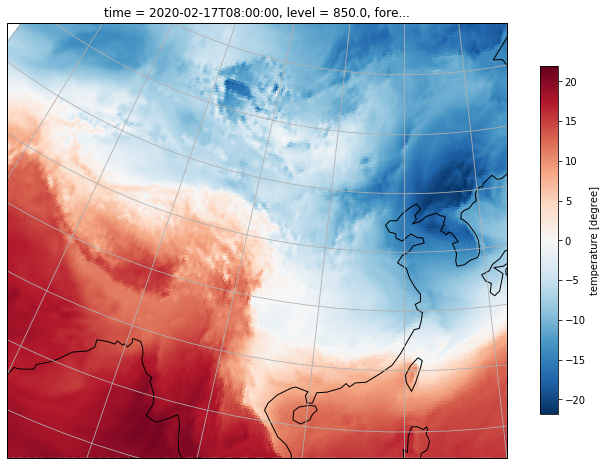

In [6]:
# 绘制图像
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=120))
data.TEM.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8})
ax.coastlines()
ax.gridlines()
ax.set_extent([80,130,15,54], crs=ccrs.PlateCarree())